In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Create knn classifier for k values of 3, 5, 7
knn_three = KNeighborsClassifier(n_neighbors=3)
knn_five = KNeighborsClassifier(n_neighbors=5)
knn_seven = KNeighborsClassifier(n_neighbors=7)
# Create naive bayes, logistic regression, and random forest
naivebayes = GaussianNB()
logisticregression = LogisticRegression()
randomforest = RandomForestClassifier()

In [3]:
# Read in data csv
weather = pd.read_csv('data/weather_data_for_classifier.csv')
# Describe the dataset
weather.describe()

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (8,10,17,41,62,64) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


STATION      LATITUDE     LONGITUDE     ELEVATION        SOURCE  \
count  1.323200e+04  1.323200e+04  1.323200e+04  1.323200e+04  13232.000000   
mean   7.448609e+10  4.063915e+01 -7.376390e+01  2.700000e+00      6.291566   
std    0.000000e+00  1.065854e-12  1.365715e-11  2.296028e-13      1.225258   
min    7.448609e+10  4.063915e+01 -7.376390e+01  2.700000e+00      4.000000   
25%    7.448609e+10  4.063915e+01 -7.376390e+01  2.700000e+00      6.000000   
50%    7.448609e+10  4.063915e+01 -7.376390e+01  2.700000e+00      7.000000   
75%    7.448609e+10  4.063915e+01 -7.376390e+01  2.700000e+00      7.000000   
max    7.448609e+10  4.063915e+01 -7.376390e+01  2.700000e+00      7.000000   

       HourlyDewPointTemperature  HourlyPrecipitation  HourlyPressureChange  \
count               12854.000000          9229.000000           5744.000000   
mean                   45.021628             0.007050              0.001039   
std                    19.054186             0.039705              0.044397   
min                    -8.000000             0.000000             -0.190000   
25%                    29.000000             0.000000             -0.020000   
50%                    46.000000             0.000000              0.000000   
75%                    62.000000             0.000000              0.030000   
max                    77.000000             0.860000              0.240000   

       HourlyPressureTendency  HourlyRelativeHumidity  ...  \
count             5744.000000            12854.000000  ...   
mean                 4.687674               69.149059  ...   
std                  2.814656               19.904253  ...   
min                  0.000000               10.000000  ...   
25%                  3.000000               54.000000  ...   
50%                  5.000000               72.000000  ...   
75%                  8.000000               87.000000  ...   
max                  9.000000              100.000000  ...   

       ShortDurationPrecipitationValue060  ShortDurationPrecipitationValue080  \
count                           11.000000                           11.000000   
mean                             0.524545                            0.572727   
std                              0.286753                            0.307899   
min                              0.140000                            0.140000   
25%                              0.285000                            0.320000   
50%                              0.470000                            0.550000   
75%                              0.740000                            0.840000   
max                              1.010000                            1.010000   

       ShortDurationPrecipitationValue100  ShortDurationPrecipitationValue120  \
count                           11.000000                           11.000000   
mean                             0.625455                            0.674545   
std                              0.345090                            0.385911   
min                              0.140000                            0.150000   
25%                              0.375000                            0.420000   
50%                              0.570000                            0.570000   
75%                              0.870000                            0.895000   
max                              1.230000                            1.320000   

       ShortDurationPrecipitationValue150  ShortDurationPrecipitationValue180  \
count                           11.000000                           11.000000   
mean                             0.735455                            0.802727   
std                              0.421387                            0.488448   
min                              0.150000                            0.150000   
25%                              0.485000                            0.530000   
50%                              0.570000                            0.570000   
75

In [4]:
# Remove the non hourly data from the dataset
weather = weather.drop(weather.columns[23:], axis=1)
# Drop information that will not be used for classification from the dataset
weather = weather.drop(['DATE','LATITUDE','NAME','LONGITUDE','ELEVATION','STATION','REPORT_TYPE','SOURCE'], axis=1)
# Hourly sky conditions is not a quantitative column
weather = weather.drop(['HourlySkyConditions'], axis=1)
# Replace any non numeric characters in each of the object columns with nothing, then convert the columns to floats
weather['HourlyAltimeterSetting'] = weather['HourlyAltimeterSetting'].str.replace('[^0-9.]+', '')
weather['HourlyAltimeterSetting'] = weather['HourlyAltimeterSetting'].astype(float)
weather['HourlyDewPointTemperature'] = weather['HourlyDewPointTemperature'].astype(float)
weather['HourlyDryBulbTemperature'] = weather['HourlyDryBulbTemperature'].str.replace('[^0-9.]+', '')
weather['HourlyDryBulbTemperature'] = weather['HourlyDryBulbTemperature'].astype(float)
weather['HourlySeaLevelPressure'] = weather['HourlySeaLevelPressure'].str.replace('[^0-9.]+', '')
weather['HourlySeaLevelPressure'] = weather['HourlySeaLevelPressure'].astype(float)
weather['HourlyStationPressure'] = weather['HourlyStationPressure'].str.replace('[^0-9.]+', '')
weather['HourlyStationPressure'] = weather['HourlyStationPressure'].astype(float)
weather['HourlyVisibility'] = weather['HourlyVisibility'].str.replace('[^0-9.]+', '')
weather['HourlyVisibility'] = weather['HourlyVisibility'].astype(float)
# This column has VRB in it, which represents variable wind direction, this will be replaced by NaN
weather['HourlyWindDirection'] = weather['HourlyWindDirection'].str.replace('VRB',str(np.NaN))
weather['HourlyWindDirection'] = weather['HourlyWindDirection'].astype(float)
# Split the present weather type into a list, load it into another dataframe, and then set the first element of the list to the present weather type
weather['HourlyPresentWeatherType'] = weather['HourlyPresentWeatherType'].str.replace('[0-9:.|+-]+', '')
weather['HourlyPresentWeatherType'] = weather['HourlyPresentWeatherType'].astype(str)
weather['HourlyPresentWeatherType'] = weather['HourlyPresentWeatherType'].str.split()
weather2 = weather['HourlyPresentWeatherType'].apply(pd.Series)
weather2 = weather2.replace('nan',np.NaN)
weather2 = weather2.backfill()
weather['HourlyPresentWeatherType'] = weather2.iloc[:,0]
# Backfill the data to fill any NaNs
weather = weather.backfill()
weather.info(verbose=True)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  # This is added back by InteractiveShellApp.init_path()
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  del sys.path[0]
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: The default value of regex will change from True to False in a future version.
  from ipykernel import kernelapp as app
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: The default value of regex will change from True to False in a future version.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: The default value of regex will change from True to False in

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13232 entries, 0 to 13231
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   HourlyAltimeterSetting     8192 non-null   float64
 1   HourlyDewPointTemperature  13230 non-null  float64
 2   HourlyDryBulbTemperature   8192 non-null   float64
 3   HourlyPrecipitation        13230 non-null  float64
 4   HourlyPresentWeatherType   13228 non-null  object 
 5   HourlyPressureChange       13226 non-null  float64
 6   HourlyPressureTendency     13226 non-null  float64
 7   HourlyRelativeHumidity     13230 non-null  float64
 8   HourlySeaLevelPressure     8192 non-null   float64
 9   HourlyStationPressure      13230 non-null  float64
 10  HourlyVisibility           13230 non-null  float64
 11  HourlyWetBulbTemperature   13230 non-null  float64
 12  HourlyWindDirection        13230 non-null  float64
 13  HourlyWindGustSpeed        13012 non-null  flo

In [5]:
weather.describe()

HourlyAltimeterSetting  HourlyDewPointTemperature  \
count             8192.000000               13230.000000   
mean                30.022816                  45.002343   
std                  0.216583                  19.047924   
min                 29.370000                  -8.000000   
25%                 29.880000                  29.000000   
50%                 30.020000                  46.000000   
75%                 30.170000                  62.000000   
max                 30.590000                  77.000000   

       HourlyDryBulbTemperature  HourlyPrecipitation  HourlyPressureChange  \
count               8192.000000         13230.000000          13226.000000   
mean                  54.547729             0.006732              0.002260   
std                   17.362275             0.039421              0.045444   
min                   16.000000             0.000000             -0.190000   
25%                   39.000000             0.000000             -0.020000   
50%                   54.000000             0.000000              0.000000   
75%                   70.000000             0.000000              0.030000   
max                   93.000000             0.860000              0.240000   

       HourlyPressureTendency  HourlyRelativeHumidity  HourlySeaLevelPressure  \
count            13226.000000            13230.000000             8192.000000   
mean                 4.564192               69.282162               30.020012   
std                  2.826288               19.854634                0.216315   
min                  0.000000               10.000000               29.360000   
25%                  3.000000               54.000000               29.880000   
50%                  5.000000               72.000000               30.020000   
75%                  8.000000               87.000000               30.160000   
max                  9.000000              100.000000               30.590000   

       HourlyStationPressure  HourlyVisibility  HourlyWetBulbTemperature  \
count           13230.000000      13230.000000              13230.000000   
mean               29.995048          9.140150                 50.868707   
std                 0.213092          2.291592                 15.747936   
min                29.310000          0.000000                 12.000000   
25%                29.850000          9.940000                 37.000000   
50%                30.000000         10.000000                 51.000000   
75%                30.140000         10.000000                 65.000000   
max                30.640000         10.000000                 80.000000   

       HourlyWindDirection  HourlyWindGustSpeed  
count         13230.000000         13012.000000  
mean            198.037037            25.188518  
std             108.318089             4.866274  
min               0.000000            16.000000  
25%             110.000000            22.000000  
50%             200.000000            24.000000  
75%             300.000000            28.000000  
max             360.000000            54.000000

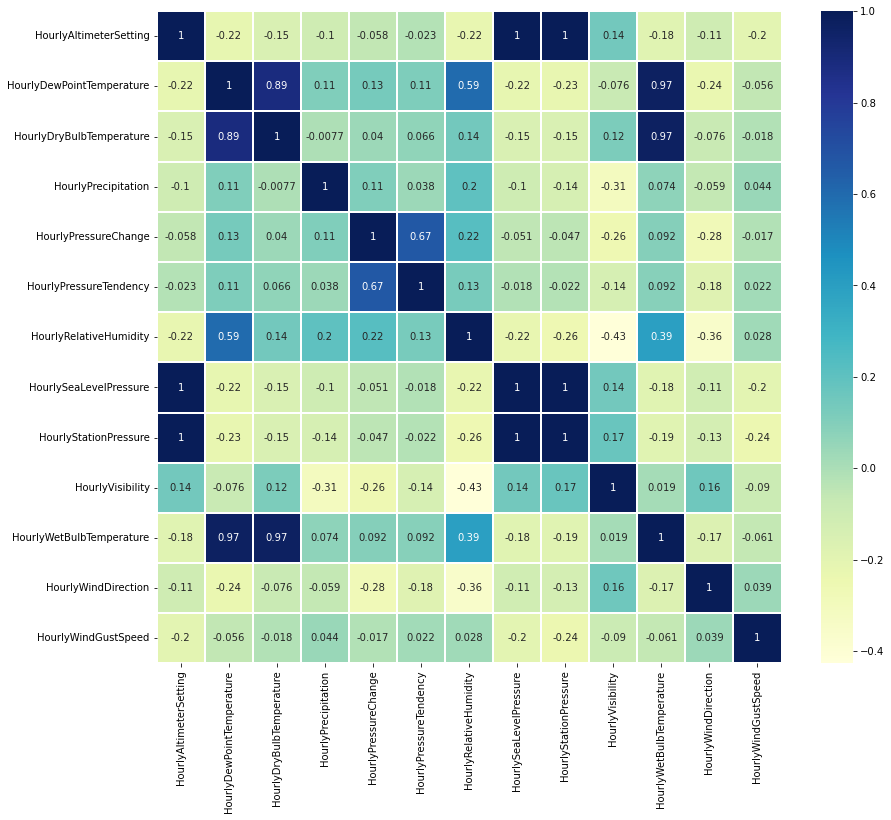

In [6]:
#create the correlation matrix heat map
plt.figure(figsize=(14,12))
sns.heatmap(weather.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

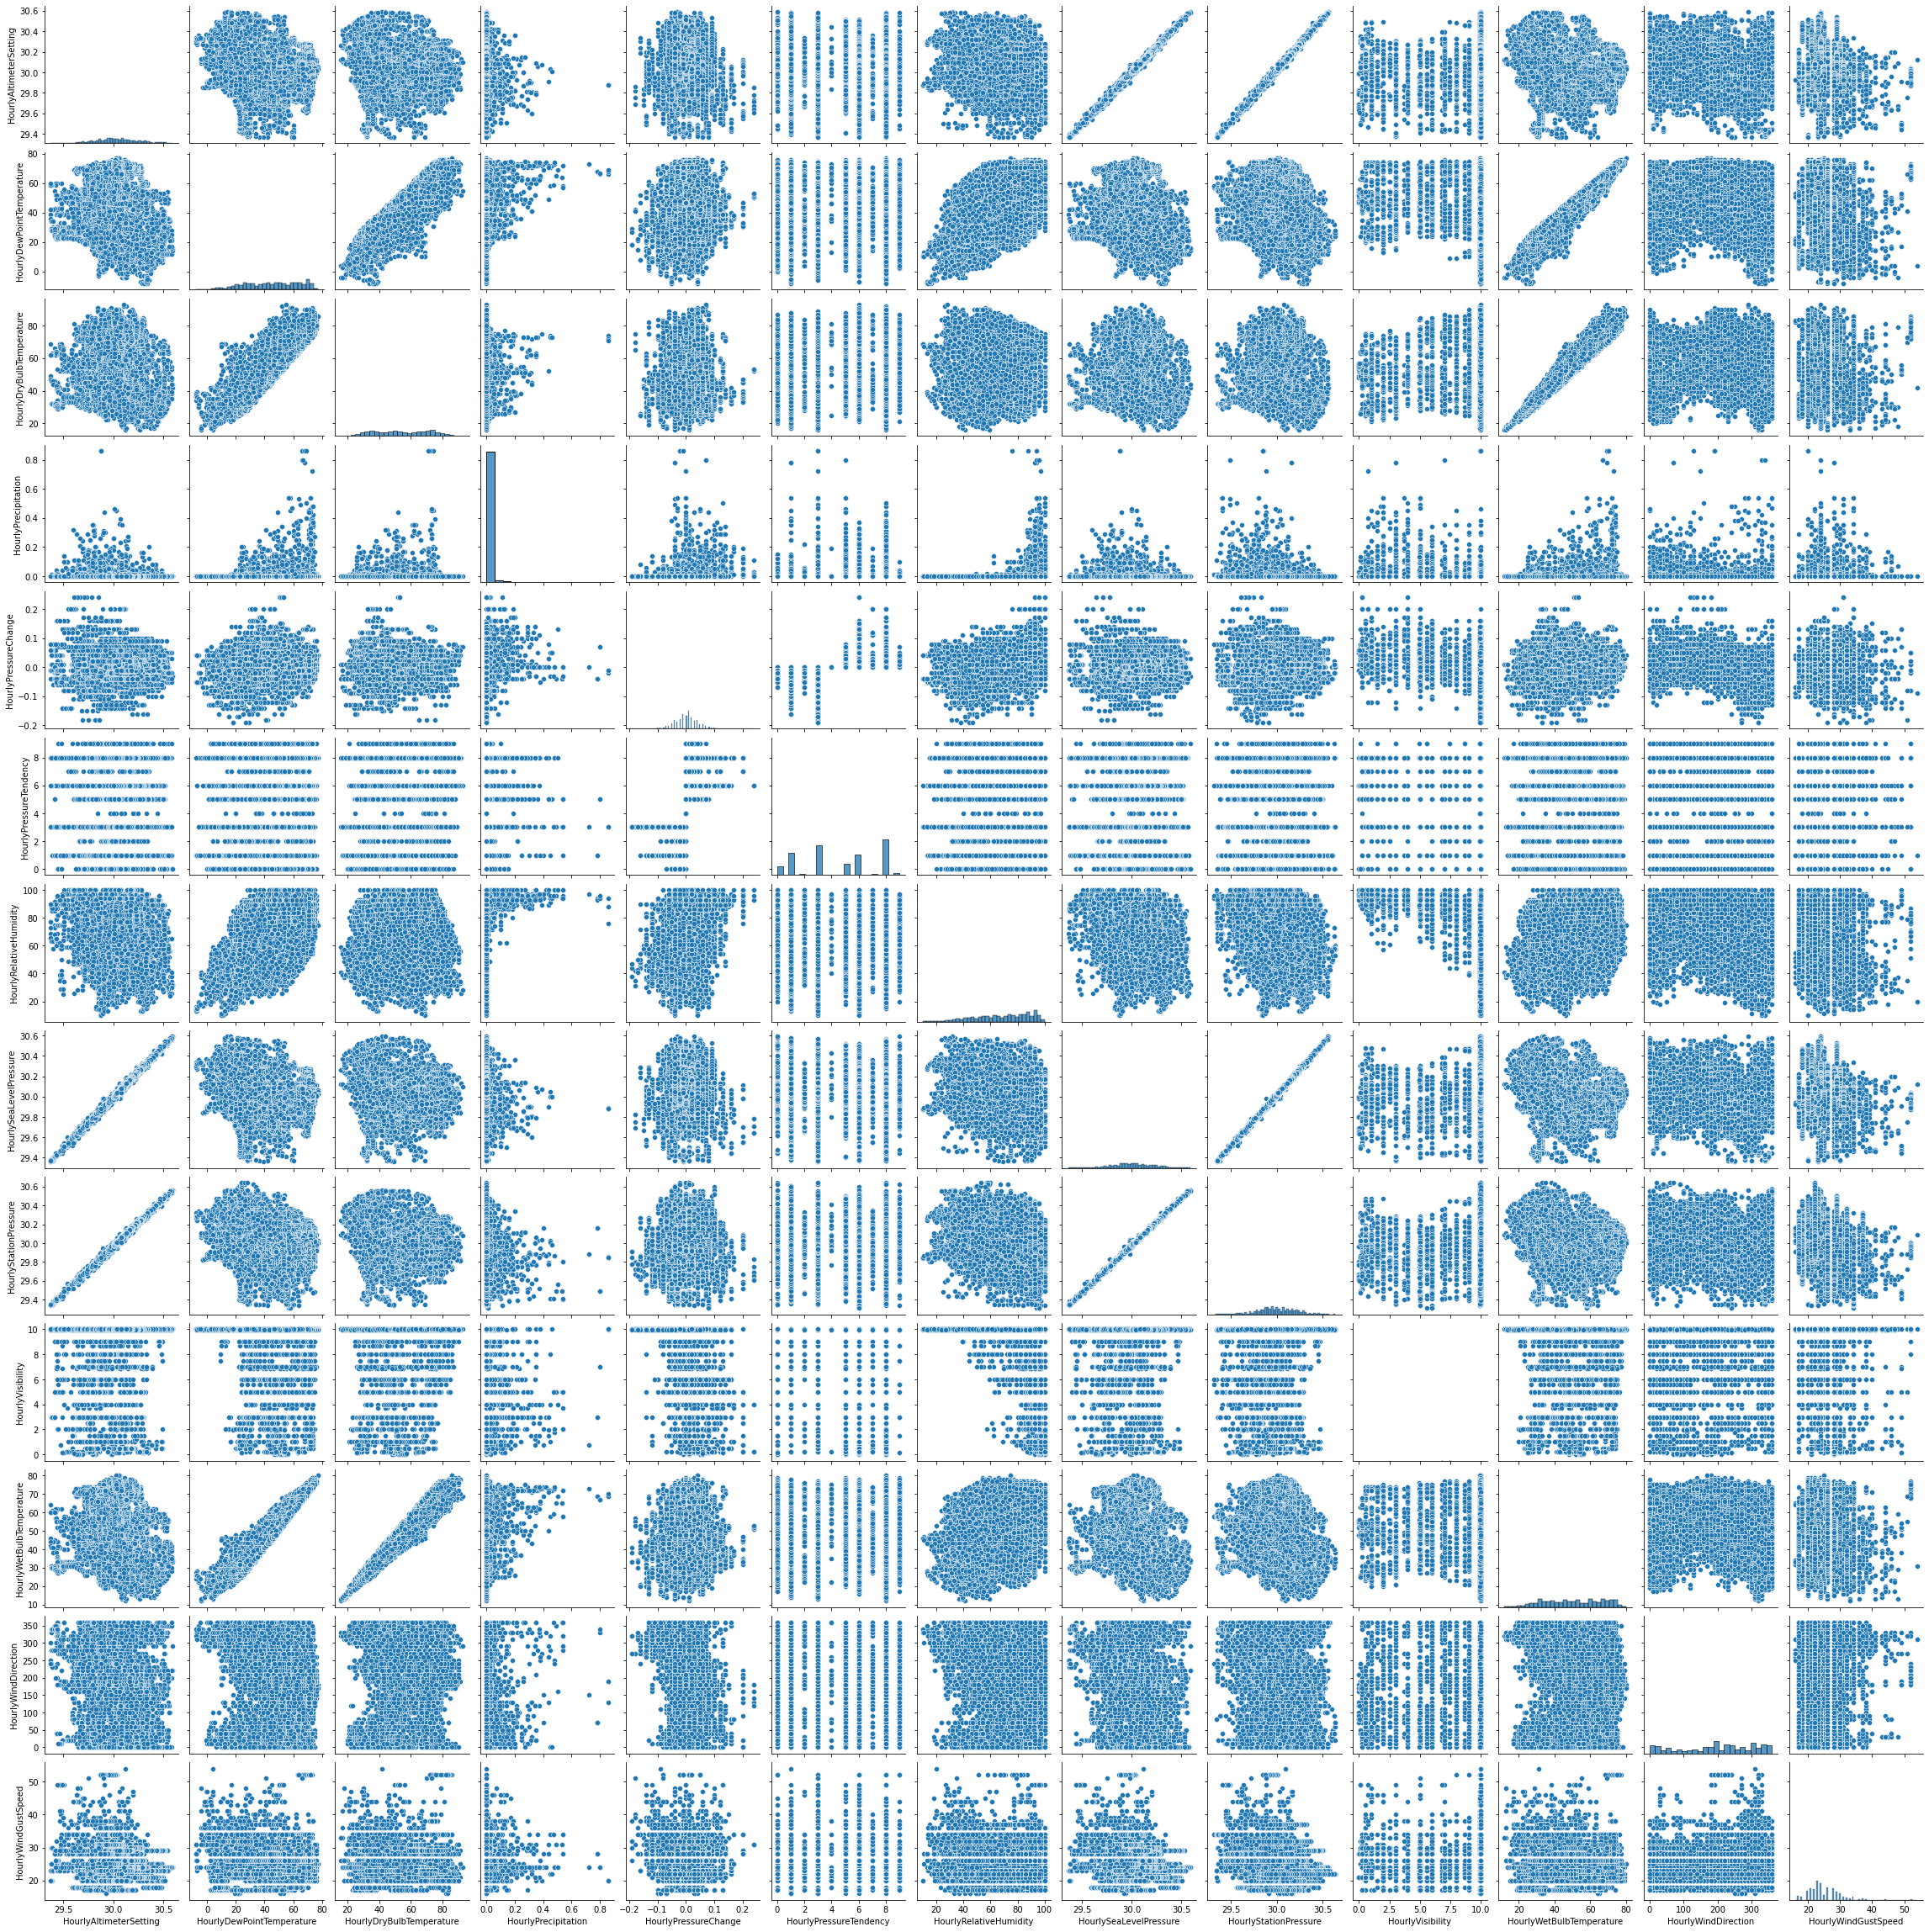

In [7]:
#pair plots
sns.pairplot(weather)

In [8]:
# Show how much of each weather type is recorded
weather['HourlyPresentWeatherType'].value_counts()

RA      7087
BR      2582
SN      1382
TS       739
VCTS     671
DZ       296
MI       123
HZ       115
PL        98
FG        66
FZ        58
FU         7
VCFG       4
Name: HourlyPresentWeatherType, dtype: int64

<AxesSubplot:>

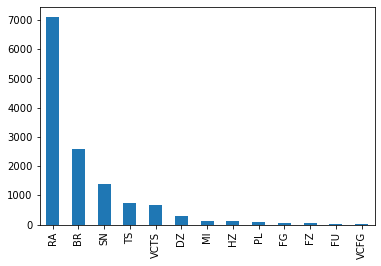

In [9]:
weather['HourlyPresentWeatherType'].value_counts().plot(kind='bar')

In [10]:
# Check for NaNs in data
weather.isna().sum()

HourlyAltimeterSetting       5040
HourlyDewPointTemperature       2
HourlyDryBulbTemperature     5040
HourlyPrecipitation             2
HourlyPresentWeatherType        4
HourlyPressureChange            6
HourlyPressureTendency          6
HourlyRelativeHumidity          2
HourlySeaLevelPressure       5040
HourlyStationPressure           2
HourlyVisibility                2
HourlyWetBulbTemperature        2
HourlyWindDirection             2
HourlyWindGustSpeed           220
dtype: int64

In [11]:
# Drop all rows that are associated with the daily and weekly data
weather = weather.dropna(subset=['HourlyAltimeterSetting'])
weather = weather.dropna(subset=['HourlyWindDirection'])
weather = weather.fillna({'HourlyWindGustSpeed':0})

In [12]:
# Check there are no more NaNs in the data
weather.isna().sum()

HourlyAltimeterSetting       0
HourlyDewPointTemperature    0
HourlyDryBulbTemperature     0
HourlyPrecipitation          0
HourlyPresentWeatherType     0
HourlyPressureChange         0
HourlyPressureTendency       0
HourlyRelativeHumidity       0
HourlySeaLevelPressure       0
HourlyStationPressure        0
HourlyVisibility             0
HourlyWetBulbTemperature     0
HourlyWindDirection          0
HourlyWindGustSpeed          0
dtype: int64

In [13]:
weather.head()

HourlyAltimeterSetting  HourlyDewPointTemperature  \
0                   30.43                       24.0   
1                   30.46                       24.0   
2                   30.46                       25.0   
3                   30.47                       25.0   
4                   30.48                       25.0   

   HourlyDryBulbTemperature  HourlyPrecipitation HourlyPresentWeatherType  \
0                      33.0                  0.0                       PL   
1                      33.0                  0.0                       PL   
2                      33.0                  0.0                       PL   
3                      32.0                  0.0                       PL   
4                      33.0                  0.0                       PL   

   HourlyPressureChange  HourlyPressureTendency  HourlyRelativeHumidity  \
0                 -0.05                     1.0                    70.0   
1                 -0.05                     1.0                    70.0   
2                 -0.05                     1.0                    72.0   
3                 -0.05                     1.0                    75.0   
4                 -0.05                     1.0                    72.0   

   HourlySeaLevelPressure  HourlyStationPressure  HourlyVisibility  \
0                   30.43                  30.40             10.00   
1                   30.43                  30.40              9.94   
2                   30.46                  30.43             10.00   
3                   30.47                  30.45             10.00   
4                   30.48                  30.45             10.00   

   HourlyWetBulbTemperature  HourlyWindDirection  HourlyWindGustSpeed  
0                      30.0                350.0                 23.0  
1                      30.0                350.0                 23.0  
2                      30.0                360.0                 23.0  
3                      30.0                360.0                 23.0  
4                      30.0                360.0                 23.0

In [14]:
weather['HourlyPresentWeatherType'].unique()

array(['PL', 'RA', 'BR', 'DZ', 'SN', 'HZ', 'FZ', 'MI', 'FG', 'TS', 'VCTS',
       'FU', 'VCFG'], dtype=object)

PL = Ice Pellets

RA = Rain

BR = Mist

DZ = Drizzle

SN = Snow

HZ = Haze

FZ = Freezing

MI = Mild

FG = Fog

TS = Thunderstorm

VCTS = Thunderstorm in Vicinity

FU = Smoke

VCFG = Fog in Vicinity

In [15]:
# Break dataset into train and test sets
train, test = train_test_split(weather, test_size = 0.2, stratify=weather['HourlyPresentWeatherType'])

In [16]:
# Break train and test into X and y
train_X = train.drop(['HourlyPresentWeatherType'],axis=1)
train_y = train.HourlyPresentWeatherType
test_X = test.drop(['HourlyPresentWeatherType'],axis=1)
test_y = test.HourlyPresentWeatherType

In [17]:
knn_three.fit(train_X,train_y)
knn_three.score(test_X,test_y)

0.7083587553386211

In [18]:
preds = knn_three.predict(test_X)
print(classification_report(test_y, preds))

              precision    recall  f1-score   support

          BR       0.65      0.73      0.69       429
          DZ       0.65      0.50      0.57        30
          FG       0.44      0.31      0.36        13
          FU       0.33      1.00      0.50         1
          FZ       0.53      0.67      0.59        12
          HZ       0.26      0.26      0.26        23
          MI       0.73      0.64      0.68        25
          PL       0.73      0.58      0.65        19
          RA       0.76      0.76      0.76       695
          SN       0.74      0.76      0.75       243
          TS       0.76      0.47      0.58        68
        VCFG       0.00      0.00      0.00         1
        VCTS       0.66      0.54      0.59        80

    accuracy                           0.71      1639
   macro avg       0.56      0.55      0.54      1639
weighted avg       0.71      0.71      0.71      1639



D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
print(pd.crosstab(test_y, preds, rownames=['Actual'], colnames=['Predicted']))

Predicted   BR  DZ  FG  FU  FZ  HZ  MI  PL   RA   SN  TS  VCTS
Actual                                                        
BR         314   1   5   0   1   1   0   2   76   26   1     2
DZ           3  15   0   0   0   0   0   0   11    1   0     0
FG           3   2   4   0   0   0   0   0    4    0   0     0
FU           0   0   0   1   0   0   0   0    0    0   0     0
FZ           1   0   0   0   8   0   0   0    0    3   0     0
HZ           5   0   0   0   0   6   0   0    8    0   1     3
MI           5   0   0   0   0   0  16   0    3    1   0     0
PL           1   1   0   0   2   0   0  11    1    3   0     0
RA         104   4   0   0   1   7   4   2  527   31   5    10
SN          29   0   0   0   3   0   2   0   25  184   0     0
TS           9   0   0   0   0   5   0   0   16    0  32     6
VCFG         0   0   0   0   0   0   0   0    0    0   0     1
VCTS         7   0   0   2   0   4   0   0   21    0   3    43


In [20]:
knn_five.fit(train_X,train_y)
knn_five.score(test_X,test_y)

0.6741915802318487

In [21]:
preds = knn_five.predict(test_X)
print(classification_report(test_y, preds))

              precision    recall  f1-score   support

          BR       0.62      0.68      0.65       429
          DZ       0.61      0.47      0.53        30
          FG       0.50      0.38      0.43        13
          FU       0.00      0.00      0.00         1
          FZ       0.50      0.58      0.54        12
          HZ       0.17      0.09      0.11        23
          MI       0.65      0.44      0.52        25
          PL       0.64      0.37      0.47        19
          RA       0.71      0.75      0.73       695
          SN       0.72      0.72      0.72       243
          TS       0.66      0.40      0.50        68
        VCFG       0.00      0.00      0.00         1
        VCTS       0.66      0.55      0.60        80

    accuracy                           0.67      1639
   macro avg       0.49      0.42      0.45      1639
weighted avg       0.67      0.67      0.67      1639



D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
print(pd.crosstab(test_y, preds, rownames=['Actual'], colnames=['Predicted']))

Predicted   BR  DZ  FG  FU  FZ  HZ  MI  PL   RA   SN  TS  VCTS
Actual                                                        
BR         292   3   4   0   0   1   1   2   99   24   0     3
DZ           3  14   0   0   0   0   0   0   12    1   0     0
FG           4   2   5   0   0   0   0   0    2    0   0     0
FU           0   0   0   0   0   0   0   0    1    0   0     0
FZ           1   0   0   0   7   0   0   0    0    4   0     0
HZ           2   0   0   0   0   2   0   0   12    0   1     6
MI           6   0   0   0   0   0  11   0    6    2   0     0
PL           0   2   0   0   2   0   1   7    3    4   0     0
RA         117   2   1   0   1   4   3   1  522   31   5     8
SN          29   0   0   0   4   0   0   1   35  174   0     0
TS           9   0   0   0   0   3   1   0   22    0  27     6
VCFG         0   0   0   0   0   0   0   0    0    0   1     0
VCTS         7   0   0   1   0   2   0   0   19    0   7    44


In [23]:
knn_seven.fit(train_X,train_y)
knn_seven.score(test_X,test_y)

0.6473459426479561

In [24]:
preds = knn_seven.predict(test_X)
print(classification_report(test_y, preds))

              precision    recall  f1-score   support

          BR       0.59      0.63      0.61       429
          DZ       0.50      0.37      0.42        30
          FG       0.62      0.38      0.48        13
          FU       0.00      0.00      0.00         1
          FZ       0.57      0.67      0.62        12
          HZ       0.22      0.09      0.12        23
          MI       0.62      0.40      0.49        25
          PL       0.82      0.47      0.60        19
          RA       0.67      0.73      0.70       695
          SN       0.72      0.71      0.72       243
          TS       0.62      0.35      0.45        68
        VCFG       0.00      0.00      0.00         1
        VCTS       0.59      0.56      0.58        80

    accuracy                           0.65      1639
   macro avg       0.50      0.41      0.44      1639
weighted avg       0.64      0.65      0.64      1639



D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
print(pd.crosstab(test_y, preds, rownames=['Actual'], colnames=['Predicted']))

Predicted   BR  DZ  FG  FU  FZ  HZ  MI  PL   RA   SN  TS  VCTS
Actual                                                        
BR         269   4   2   0   0   1   2   0  120   27   1     3
DZ           5  11   0   0   0   0   0   0   13    1   0     0
FG           4   2   5   0   0   0   0   0    2    0   0     0
FU           0   0   0   0   0   0   0   0    1    0   0     0
FZ           1   0   0   0   8   0   0   0    0    3   0     0
HZ           1   0   0   0   0   2   0   0   14    0   1     5
MI           5   0   0   0   0   0  10   0    8    2   0     0
PL           0   3   0   0   2   0   0   9    2    3   0     0
RA         129   2   1   0   1   5   3   2  505   30   5    12
SN          28   0   0   0   3   0   0   0   39  173   0     0
TS           7   0   0   0   0   1   1   0   24    0  24    11
VCFG         0   0   0   0   0   0   0   0    1    0   0     0
VCTS         6   0   0   1   0   0   0   0   20    0   8    45


In [26]:
naivebayes.fit(train_X,train_y)
naivebayes.score(test_X,test_y)

0.48322147651006714

In [27]:
preds = naivebayes.predict(test_X)
print(classification_report(test_y, preds))

              precision    recall  f1-score   support

          BR       0.53      0.50      0.51       429
          DZ       0.19      0.43      0.27        30
          FG       0.34      1.00      0.51        13
          FU       0.12      1.00      0.22         1
          FZ       0.40      0.50      0.44        12
          HZ       0.12      0.83      0.21        23
          MI       0.23      0.84      0.36        25
          PL       0.20      0.84      0.32        19
          RA       0.87      0.35      0.50       695
          SN       0.56      0.67      0.61       243
          TS       0.50      0.29      0.37        68
        VCFG       0.00      0.00      0.00         1
        VCTS       0.39      0.79      0.52        80

    accuracy                           0.48      1639
   macro avg       0.34      0.62      0.37      1639
weighted avg       0.64      0.48      0.50      1639



D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
print(pd.crosstab(test_y, preds, rownames=['Actual'], colnames=['Predicted']))

Predicted   BR  DZ  FG  FU  FZ  HZ  MI  PL   RA   SN  TS  VCTS
Actual                                                        
BR         213  13  15   1   1  27  41  28   21   54   1    14
DZ           7  13   5   0   1   0   0   1    3    0   0     0
FG           0   0  13   0   0   0   0   0    0    0   0     0
FU           0   0   0   1   0   0   0   0    0    0   0     0
FZ           0   0   0   0   6   0   0   3    0    3   0     0
HZ           0   3   0   0   0  19   0   0    0    0   0     1
MI           0   0   0   0   0   0  21   0    1    3   0     0
PL           0   0   0   0   1   0   2  16    0    0   0     0
RA         163  32   5   1   1  84  16   8  245   67  19    54
SN          22   6   0   0   5   0  12  26   10  162   0     0
TS           0   0   0   0   0  17   0   0    2    0  20    29
VCFG         0   0   0   0   0   0   0   0    0    0   0     1
VCTS         0   0   0   5   0  11   0   0    1    0   0    63


In [29]:
logisticregression.fit(train_X,train_y)
logisticregression.score(test_X,test_y)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.4777303233679073

In [30]:
preds = logisticregression.predict(test_X)
print(classification_report(test_y, preds))

              precision    recall  f1-score   support

          BR       0.35      0.17      0.23       429
          DZ       0.00      0.00      0.00        30
          FG       0.00      0.00      0.00        13
          FU       0.00      0.00      0.00         1
          FZ       0.00      0.00      0.00        12
          HZ       0.00      0.00      0.00        23
          MI       0.00      0.00      0.00        25
          PL       0.00      0.00      0.00        19
          RA       0.52      0.78      0.63       695
          SN       0.46      0.58      0.51       243
          TS       0.00      0.00      0.00        68
        VCFG       0.00      0.00      0.00         1
        VCTS       0.37      0.33      0.34        80

    accuracy                           0.48      1639
   macro avg       0.13      0.14      0.13      1639
weighted avg       0.40      0.48      0.42      1639



D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
print(pd.crosstab(test_y, preds, rownames=['Actual'], colnames=['Predicted']))

Predicted  BR  DZ  PL   RA   SN  TS  VCTS
Actual                                   
BR         73   0   0  287   65   2     2
DZ          7   0   0   19    4   0     0
FG         13   0   0    0    0   0     0
FU          0   0   0    0    0   0     1
FZ          0   0   0    0   12   0     0
HZ          2   0   0   13    0   0     8
MI          7   0   0   11    7   0     0
PL          0   0   0    4   15   0     0
RA         66   3   0  543   61   2    20
SN         40   0   2   60  141   0     0
TS          0   0   0   54    0   0    14
VCFG        0   0   0    1    0   0     0
VCTS        1   0   0   49    0   4    26


In [32]:
randomforest.fit(train_X,train_y)
randomforest.score(test_X,test_y)

0.9456985967053081

In [33]:
preds = randomforest.predict(test_X)
print(classification_report(test_y, preds))

              precision    recall  f1-score   support

          BR       0.95      0.95      0.95       429
          DZ       0.89      0.80      0.84        30
          FG       0.62      0.77      0.69        13
          FU       1.00      1.00      1.00         1
          FZ       1.00      0.83      0.91        12
          HZ       1.00      0.83      0.90        23
          MI       0.92      0.92      0.92        25
          PL       0.95      1.00      0.97        19
          RA       0.94      0.97      0.96       695
          SN       0.96      0.95      0.95       243
          TS       0.97      0.82      0.89        68
        VCFG       0.00      0.00      0.00         1
        VCTS       0.96      0.91      0.94        80

    accuracy                           0.95      1639
   macro avg       0.86      0.83      0.84      1639
weighted avg       0.95      0.95      0.95      1639



D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
print(pd.crosstab(test_y, preds, rownames=['Actual'], colnames=['Predicted']))

Predicted   BR  DZ  FG  FU  FZ  HZ  MI  PL   RA   SN  TS  VCTS
Actual                                                        
BR         408   1   6   0   0   0   1   0    9    4   0     0
DZ           1  24   0   0   0   0   0   0    5    0   0     0
FG           1   0  10   0   0   0   0   0    2    0   0     0
FU           0   0   0   1   0   0   0   0    0    0   0     0
FZ           0   0   0   0  10   0   0   0    1    1   0     0
HZ           1   0   0   0   0  19   0   0    3    0   0     0
MI           2   0   0   0   0   0  23   0    0    0   0     0
PL           0   0   0   0   0   0   0  19    0    0   0     0
RA          10   2   0   0   0   0   0   0  677    4   1     1
SN           2   0   0   0   0   0   0   1   10  230   0     0
TS           2   0   0   0   0   0   0   0    8    0  56     2
VCFG         1   0   0   0   0   0   0   0    0    0   0     0
VCTS         1   0   0   0   0   0   1   0    4    0   1    73
